In [1]:
# Importl libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from interp_mask import interp_mask # load the main function

# Load two example masks
mask1 = Image.open('Examples/slice_7.png')
mask2 = Image.open('Examples/slice_9.png')

# Apply interpolation
interpolated_mask = interp_mask(mask1, mask2)

# Save the interpolated mask
interpolated_mask = Image.fromarray(interpolated_mask)
interpolated_mask.save('Examples/interpolated_mask.png')

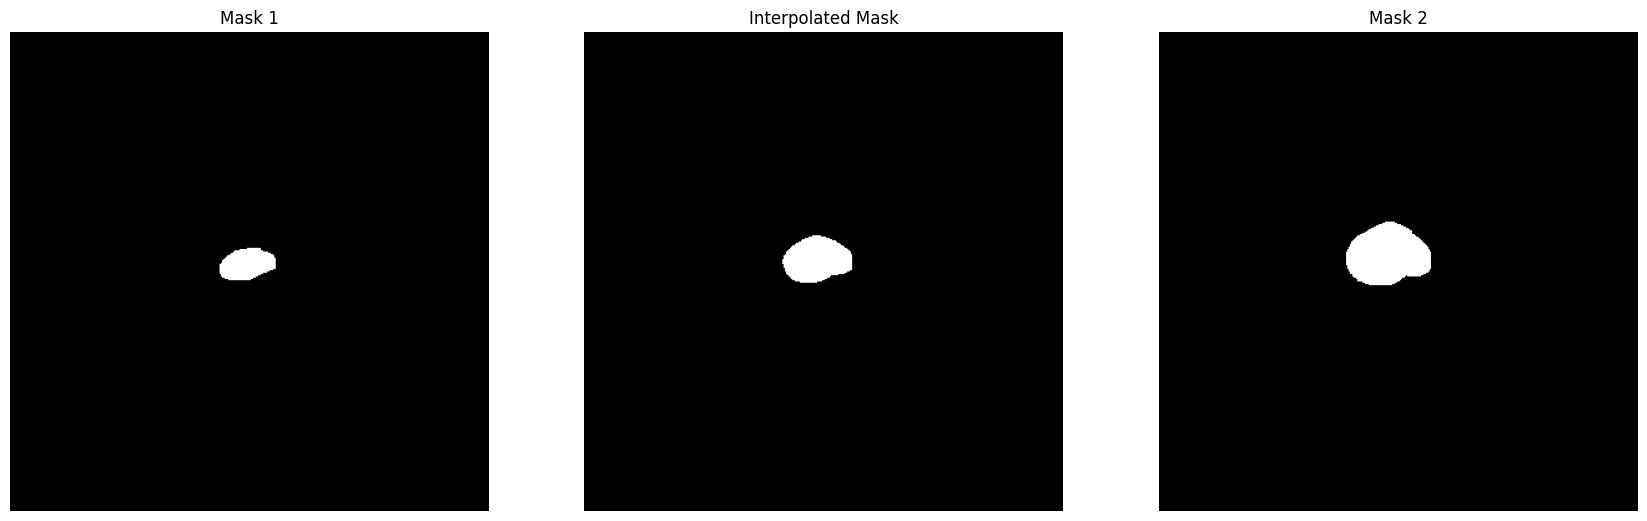

In [2]:
# Plot #1
fig, axes = plt.subplots(1, 3, figsize=(21, 21))
for ax, img, title in zip(axes, [mask1, interpolated_mask, mask2], ['Mask 1', 'Interpolated Mask', 'Mask 2']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()

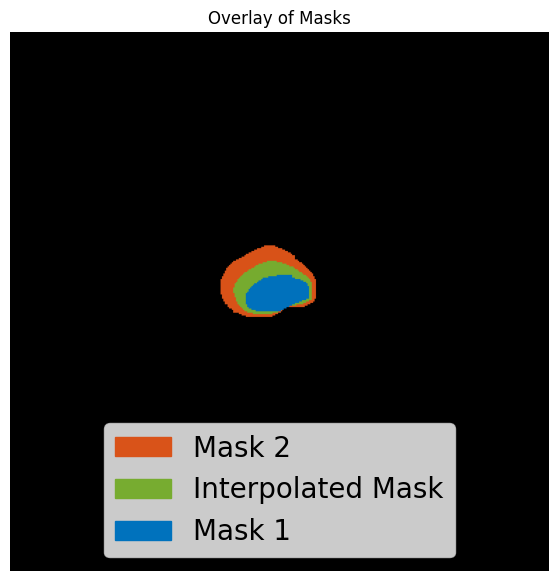

In [3]:
# Plot #2
mask1, interpolated_mask, mask2 = np.array(mask1), np.array(interpolated_mask), np.array(mask2)

overlay = np.zeros_like(mask1, dtype=np.uint8)
overlay_rgb = np.zeros((*overlay.shape, 3), dtype=np.uint8)

overlay_rgb[mask2 > 0] = np.array([0.8500, 0.3250, 0.0980])*255
overlay_rgb[interpolated_mask > 0] = np.array([0.4660, 0.6740, 0.1880])*255
overlay_rgb[mask1 > 0] = np.array([0, 0.4470, 0.7410])*255

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(overlay_rgb)
ax.set_title('Overlay of Masks')
ax.axis('off')

legend_patches = [
    mpatches.Patch(color=[0.8500, 0.3250, 0.0980], label='Mask 2'),
    mpatches.Patch(color=[0.4660, 0.6740, 0.1880], label='Interpolated Mask'),
    mpatches.Patch(color=[0, 0.4470, 0.7410], label='Mask 1')
]

ax.legend(handles=legend_patches, loc='lower center', prop={'size': 20})

plt.show()